In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%config InlineBackend.figure_format = 'svg'
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["image.cmap"] = "viridis"

In [3]:
df = pd.read_csv('data/mlbootcamp5_train.csv', sep=';')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [4]:
df = df[df.ap_lo <= df.ap_hi]
df = df[df.height >= df.height.quantile(0.025)]
df = df[df.height <= df.height.quantile(0.975)]
df = df[df.weight >= df.weight.quantile(0.025)]
df = df[df.weight <= df.weight.quantile(0.975)]
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,1,1,0,0,1,1
69994,99992,21074,1,165,80.0,150,80,1,1,0,0,1,1
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


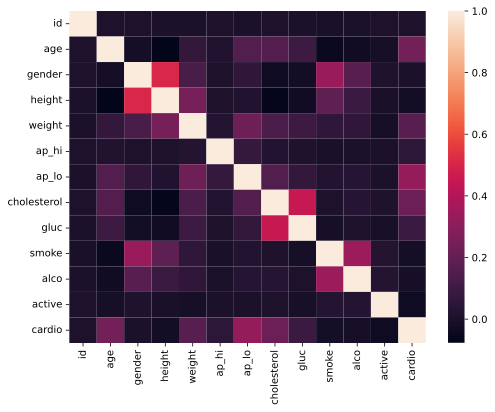

In [5]:
# Question 2.1. (1 point). Which pair of features has the strongest Pearson’s correlation with the gender feature?
# 1. Cardio, Cholesterol
# 2. Height, Smoke
# 3. Smoke, Alco
# 4. Height, Weight

corr = df.corr()
sns.heatmap(data=corr)
plt.show()

# Answer: 2

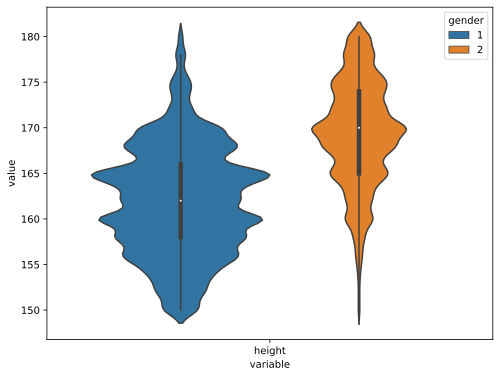

In [6]:
# Create a violin plot for the height and gender using violinplot().

df_melt = pd.melt(df, value_vars='height', id_vars='gender')
sns.violinplot(x='variable', y='value', hue='gender', data=df_melt, scale="count")
plt.show()

<Axes: >

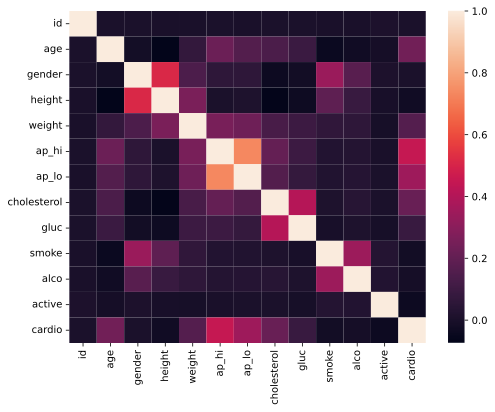

In [7]:
# Question 2.2. Which pair of features has the strongest Spearman rank correlation?
# 1. Height, Weight
# 2. Age, Weight
# 3. Cholesterol, Gluc
# 4. Cardio, Cholesterol
# 5. Ap_hi, Ap_lo
# 6. Smoke, Alco

sns.heatmap(df.corr(method='spearman'))

# Answer: 5

# Question 2.3. Why do these features have strong rank correlation?
# 1. Inaccuracies in the data (data acquisition errors).
# 2. Relation is wrong, these features should not be related.
# 3. Nature of the data.

# Answer: 3.

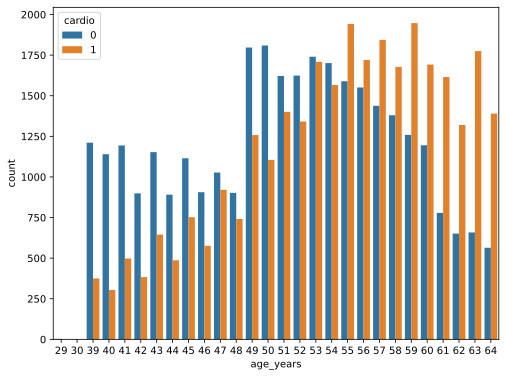

In [8]:
# Create a count plot using countplot() with the age on the X axis and the number of people on the Y axis. 
# Your resulting plot should have two columns for each age, corresponding to the number of people 
# for each cardio class of that age.

df['age_years'] = (df['age']/365.0).map(int)
sns.countplot(data=df, x='age_years', hue='cardio')
plt.show()